### Importación de datos



In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
tienda2.head()
tienda3.head()
tienda4.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


#Promedio General de grafico:

In [88]:
def getAverageGeneralGraphics(x,y):
    promedio_general = sum(x)/len(x)
    plt.axhline(y=promedio_general, color='red', linestyle='--', linewidth=1.5, alpha=0.7)
    plt.text(len(y)-0.3, promedio_general + 0.05*max(x),
            f'Promedio general: {promedio_general:,.2f}',
            color='red', ha='right', va='bottom')

#1. Análisis de facturación



In [98]:
def sumaPorTienda(x):
  total = sum(x['Precio'])
  return total

totalTienda1 = sumaPorTienda(tienda)
totalTienda2 = sumaPorTienda(tienda2)
totalTienda3 = sumaPorTienda(tienda3)
totalTienda4 = sumaPorTienda(tienda4)

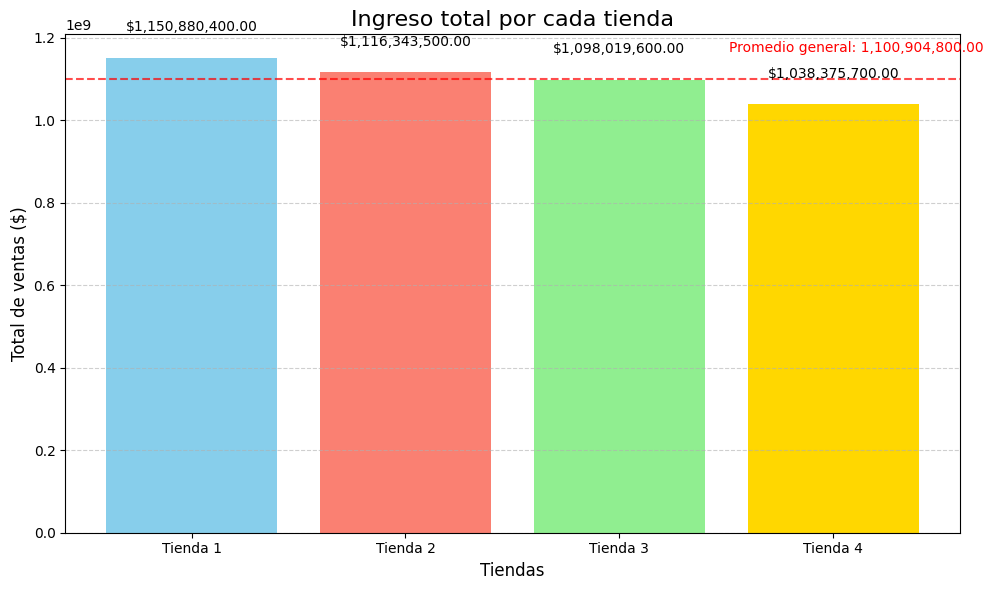

In [99]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
totales = [totalTienda1, totalTienda2, totalTienda3, totalTienda4]

plt.figure(figsize=(10, 6))
plt.bar(tiendas, totales, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Ingreso total por cada tienda', fontsize=16)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Total de ventas ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, total in enumerate(totales):
    plt.text(i, total + 0.05*max(totales), f"${total:,.2f}",
             ha='center', va='bottom', fontsize=10)

getAverageGeneralGraphics(totales, tiendas)
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [4]:
def getProductoMasPopularPorTienda(x):
    ventas_por_categoria = x.groupby('Categoría del Producto')['Producto'].count()
    ventas_ordenadas = ventas_por_categoria.sort_values(ascending=False)
    categoria_top = ventas_ordenadas.head(1)
    return categoria_top

topProductoT1= getProductoMasPopularPorTienda(tienda)
topProductoT2= getProductoMasPopularPorTienda(tienda2)
topProductoT3= getProductoMasPopularPorTienda(tienda3)
topProductoT4= getProductoMasPopularPorTienda(tienda4)

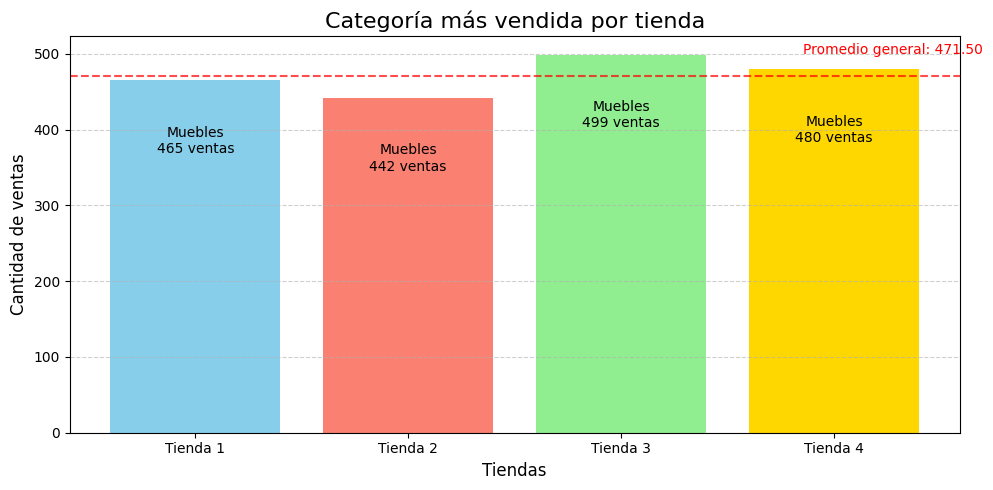

In [90]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
totales = [topProductoT1.values[0], topProductoT2.values[0],topProductoT3.values[0], topProductoT4.values[0]]
categorias = [topProductoT1.index[0], topProductoT2.index[0],topProductoT3.index[0], topProductoT4.index[0]]

plt.figure(figsize=(10, 5))
bars = plt.bar(tiendas, totales, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Categoría más vendida por tienda', fontsize=16)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Cantidad de ventas', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, (bar, total, categoria) in enumerate(zip(bars, totales, categorias)):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.2*max(totales),
             f"{categoria}\n{total} ventas",
             ha='center', va='bottom', fontsize=10)
getAverageGeneralGraphics(totales, tiendas)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [5]:
def getAverageStore(x):
  average = sum(x['Calificación']) / x['Calificación'].count()
  return average

averageTienda1 = round(getAverageStore(tienda), 2)
averageTienda2 = round(getAverageStore(tienda2), 2)
averageTienda3 = round(getAverageStore(tienda3), 2)
averageTienda4 = round(getAverageStore(tienda4), 2)

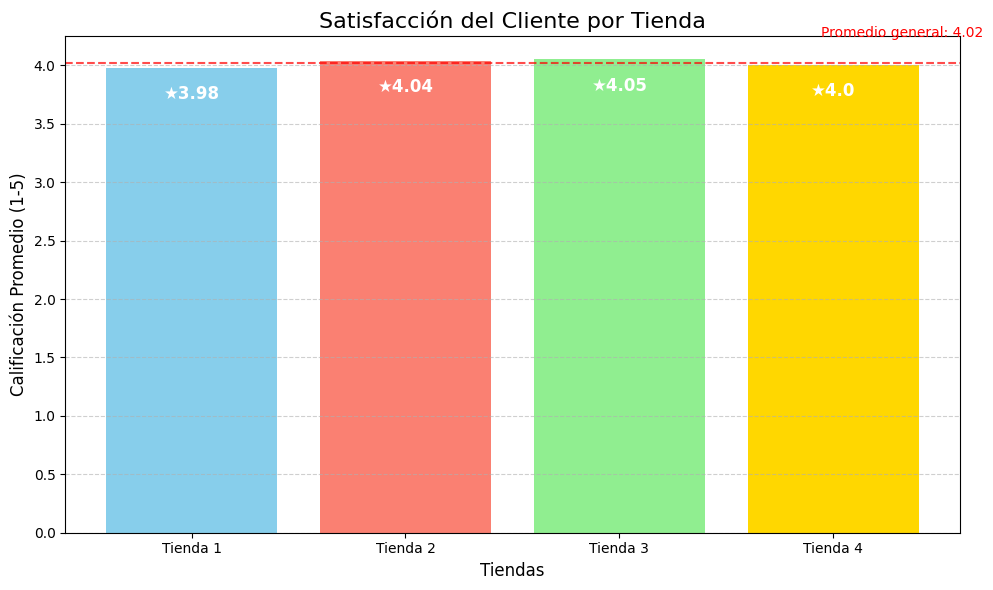

In [91]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promedios = [averageTienda1, averageTienda2, averageTienda3, averageTienda4]

plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, promedios, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Satisfacción del Cliente por Tienda', fontsize=16)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Calificación Promedio (1-5)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, promedio in zip(bars, promedios):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.3,
             f"★{promedio}",
             ha='center', va='bottom', fontsize=12, color='white', weight='bold')

getAverageGeneralGraphics(promedios, tiendas)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [23]:
def getProductoMasVendido(df):
    ventas = df['Producto'].value_counts()
    return ventas.nlargest(1)

productoMasVendidoT1 = getProductoMasVendido(tienda)
productoMasVendidoT2 = getProductoMasVendido(tienda2)
productoMasVendidoT3 = getProductoMasVendido(tienda3)
productoMasVendidoT4 = getProductoMasVendido(tienda4)

In [38]:
def getProductoMenosVendido(df):
    ventas = df['Producto'].value_counts()
    return ventas.nsmallest(1)

productoMenosVendidoT1 = getProductoMenosVendido(tienda)
productoMenosVendidoT2 = getProductoMenosVendido(tienda2)
productoMenosVendidoT3 = getProductoMenosVendido(tienda3)
productoMenosVendidoT4 = getProductoMenosVendido(tienda4)

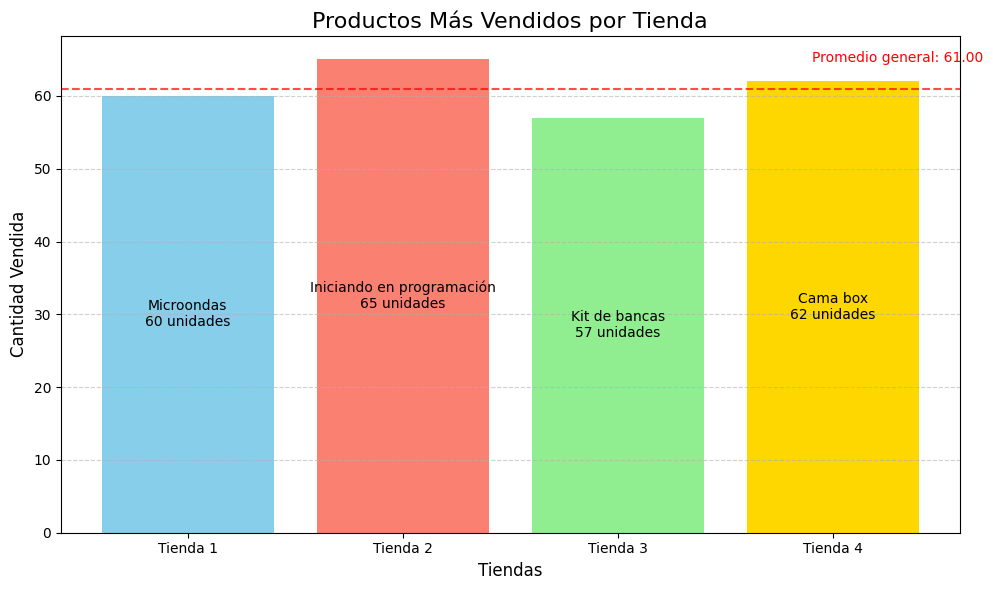

In [92]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
nombresMV = [productoMasVendidoT1.index[0], productoMasVendidoT2.index[0], productoMasVendidoT3.index[0], productoMasVendidoT4.index[0]]
valoresMV = [productoMasVendidoT1.values[0], productoMasVendidoT2.values[0], productoMasVendidoT3.values[0], productoMasVendidoT4.values[0]]

plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, valoresMV, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Productos Más Vendidos por Tienda', fontsize=16)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, nombre, valor in zip(bars, nombresMV, valoresMV):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f"{nombre}\n{valor} unidades",
             ha='center', va='center', fontsize=10, color='black')

getAverageGeneralGraphics(valoresMV, tiendas)
plt.tight_layout()
plt.show()

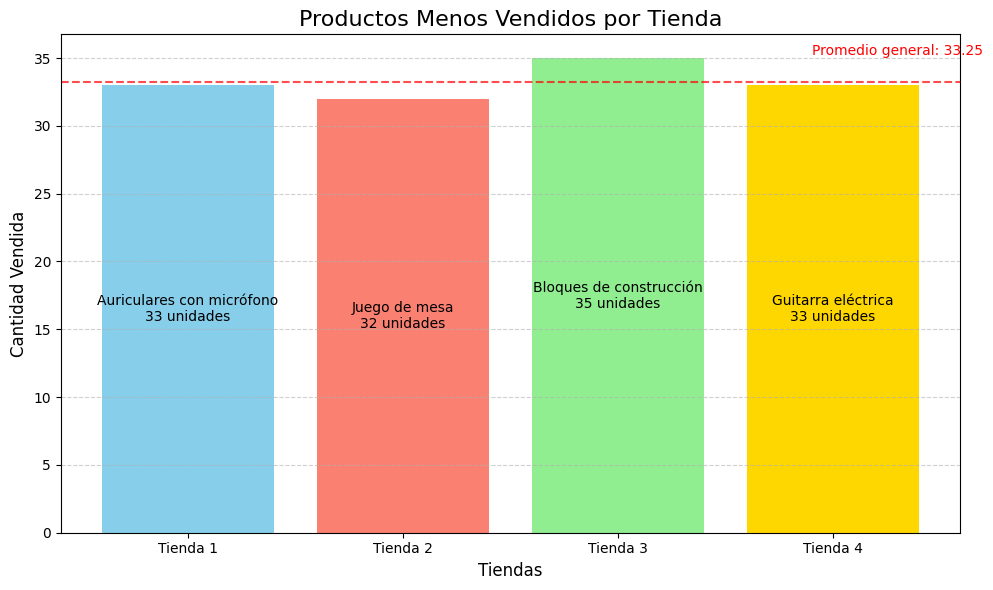

In [93]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
nombresMeV = [productoMenosVendidoT1.index[0], productoMenosVendidoT2.index[0], productoMenosVendidoT3.index[0], productoMenosVendidoT4.index[0]]
valoresMeV = [productoMenosVendidoT1.values[0], productoMenosVendidoT2.values[0], productoMenosVendidoT3.values[0], productoMenosVendidoT4.values[0]]

plt.figure(figsize=(10, 6))
bars = plt.bar(tiendas, valoresMeV, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Productos Menos Vendidos por Tienda', fontsize=16)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, nombre, valor in zip(bars, nombresMeV, valoresMeV):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height/2,
             f"{nombre}\n{valor} unidades",
             ha='center', va='center', fontsize=10, color='black')
getAverageGeneralGraphics(valoresMeV, tiendas)
plt.tight_layout()
plt.show()

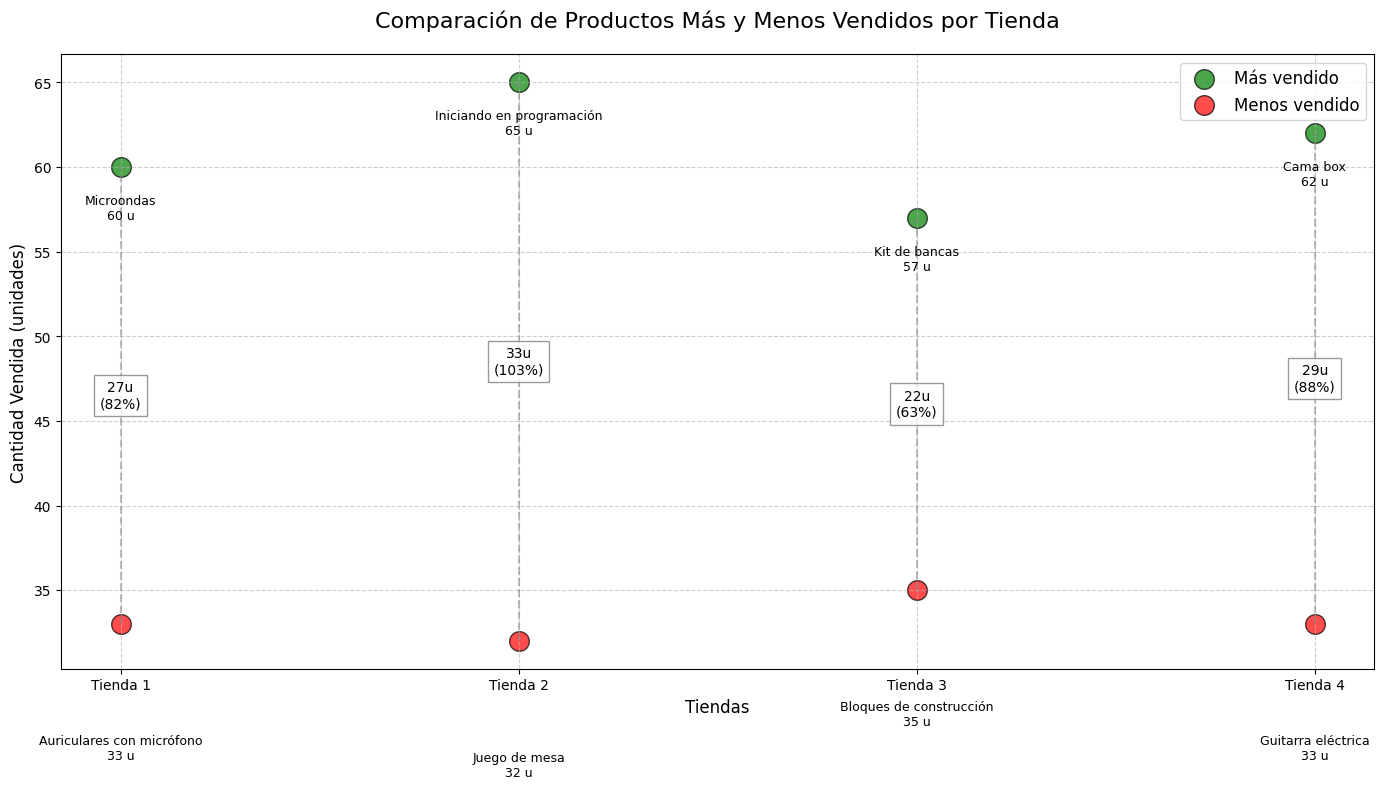

In [107]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
x_pos = np.arange(len(tiendas))

plt.figure(figsize=(14, 8))
plt.scatter(x_pos, valoresMV, color='green', s=200, label='Más vendido', alpha=0.7, edgecolors='black')
plt.scatter(x_pos, valoresMeV, color='red', s=200, label='Menos vendido', alpha=0.7, edgecolors='black')

for i in range(len(tiendas)):
    plt.plot([x_pos[i], x_pos[i]], [valoresMeV[i], valoresMV[i]],
             color='gray', linestyle='--', alpha=0.5)

for i, (mv_n, mv_v, mev_n, mev_v) in enumerate(zip(nombresMV, valoresMV, nombresMeV, valoresMeV)):
    plt.text(x_pos[i], mv_v - 0.05*max(valoresMV),
             f"{mv_n}\n{mv_v} u", ha='center', va='bottom', fontsize=9)
    plt.text(x_pos[i], mev_v - 0.10*max(valoresMV),
             f"{mev_n}\n{mev_v} u", ha='center', va='top', fontsize=9)

plt.title('Comparación de Productos Más y Menos Vendidos por Tienda', fontsize=16, pad=20)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Cantidad Vendida (unidades)', fontsize=12)
plt.xticks(x_pos, tiendas)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

for i in range(len(tiendas)):
    diferencia = valoresMV[i] - valoresMeV[i]
    porcentaje = (diferencia / valoresMeV[i]) * 100
    plt.text(x_pos[i], (valoresMV[i] + valoresMeV[i])/2,
             f"{diferencia}u\n({porcentaje:.0f}%)",
             ha='center', va='center', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [55]:
def getAverageShippin(x):
  average = sum(x['Costo de envío']) / x['Costo de envío'].count()
  return average
averageTiendaS1 = round(getAverageShippin(tienda), 2)
averageTiendaS2 = round(getAverageShippin(tienda2), 2)
averageTiendaS3 = round(getAverageShippin(tienda3), 2)
averageTiendaS4 = round(getAverageShippin(tienda4), 2)


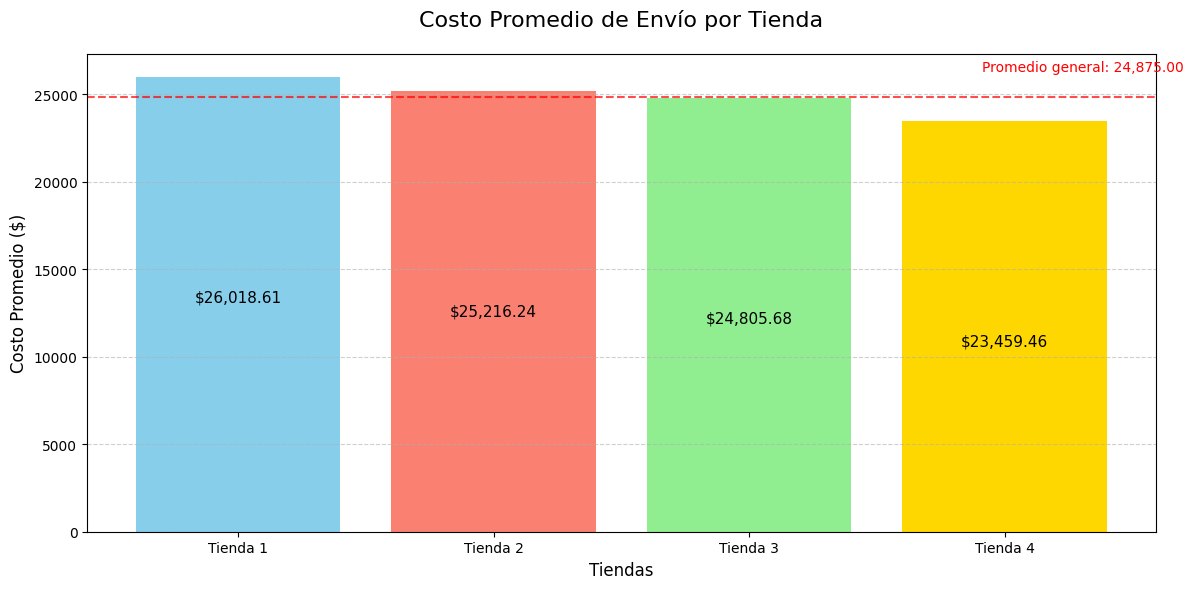

In [95]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
promediosS = [averageTiendaS1, averageTiendaS2, averageTiendaS3, averageTiendaS4]

plt.figure(figsize=(12, 6))
bars = plt.bar(tiendas, promediosS, color=['skyblue', 'salmon', 'lightgreen', 'gold'])

plt.title('Costo Promedio de Envío por Tienda', fontsize=16, pad=20)
plt.xlabel('Tiendas', fontsize=12)
plt.ylabel('Costo Promedio ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar, costo in zip(bars, promediosS):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height - 0.5*max(promediosS),
             f"${costo:,.2f}",
             ha='center', va='bottom', fontsize=11, color='black')

getAverageGeneralGraphics(promediosS, tiendas)

plt.tight_layout()
plt.show()

#Análisis final
El propósito de este análisis fue identificar cuál de las cuatro tiendas disponibles representa la mejor opción para que el Sr. Juan realice una inversión estratégica. Para ello, se tomaron en cuenta diversos factores claves como los ingresos totales por tienda, las categorías de productos más y menos vendidos, las calificaciones promedio de los clientes, los productos más y menos solicitados, y el coste promedio de envío. A partir de los datos y gráficos generados en este análisis, se presenta a continuación una evaluación comparativa con base en los principales indicadores.

Tras examinar los datos, se ha identificado que la Tienda 3 representa la mejor opción para invertir, debido a los siguientes motivos:

1.  **Ingresos totales**
Aunque la Tienda 3 presenta ingresos por debajo del promedio general, esta diferencia es mínima (solo dos puntos). Este nivel es aceptable y demuestra que, a pesar de no liderar en ingresos, mantiene una posición sólida y constante en el mercado.

2.  **Categoría más vendida**
En la Tienda 3, la categoría más vendida es muebles, una industria esencial y con demanda sostenida en el tiempo. Este rubro se encuentra 28 puntos por encima del promedio en ventas, lo cual refuerza su potencial de crecimiento y estabilidad.

3.  **Satisfacción del cliente**
Las calificaciones promedio de los clientes en la Tienda 3 son tres puntos superiores al promedio, lo cual refleja una mayor aceptación de sus productos y un nivel de satisfacción que podría traducirse en fidelidad del cliente y buena reputación de marca.

4.  **Productos más y menos vendidos**
El producto más vendido en la Tienda 3 es el kit de bancas, con 57 unidades, ligeramente por debajo del promedio. No obstante, al observar los productos menos vendidos, esta tienda muestra la menor diferencia entre productos más y menos vendidos, superando el promedio por solo dos puntos. Esto indica una mejor distribución y consistencia en las ventas, sin depender de un solo producto estrella.

5.  **Coste de envío**
Otro aspecto muy favorable es que el precio promedio de envío en la Tienda 3 es más bajo que en las demás tiendas, lo cual la convierte en una opción más atractiva tanto para el inversionista como para los consumidores, al reducir costos logísticos.

Con base en todos los indicadores analizados, la Tienda 3 destaca como la mejor opción para que el Sr. Juan realice su inversión. A pesar de no tener el ingreso más alto, muestra fortalezas importantes en estabilidad de ventas, aceptación del cliente, liderazgo en una categoría clave como muebles, y eficiencia en costos de envío.

Esto sugiere que se trata de una inversión segura a largo plazo, con un riesgo menor en comparación con las demás opciones. Más que buscar ganancias rápidas, esta elección apunta a un crecimiento constante y sostenido.